# Test Visualization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import descartes
from shapely.geometry import Point,Polygon

In [2]:
nyc_map = gpd.read_file('/Users/krishna-mac/Desktop/CitadelDataOpen/Map/geo_export_aef695bc-13cc-4e8c-b773-e2fc7ebcae80.shp')

In [3]:
data = [[40.804257830123234,-73.96292178407724],[40.6263569040008,-74.14846877572353],[40.86225870037599,-73.86847711683846]]
latlong = pd.DataFrame(data, columns = ['Latitude','Longitude'])
latlong

,Latitude,Longitude
0,40.804258,-73.962922
1,40.626357,-74.148469
2,40.862259,-73.868477


In [4]:
geometry = [Point(xy) for xy in zip(latlong['Longitude'],latlong['Latitude'])]
crs = 'EPSG:4326'
geo_df = gpd.GeoDataFrame(latlong, crs = crs, geometry = geometry)

In [ ]:
fig,ax = plt.subplots(figsize = (15,15))
nyc_map.plot(ax = ax, color = 'lightgrey')
geo_df.plot(ax = ax, markersize = 20, color = 'red', marker = 'o')

# Graffiti Visualization

In [7]:
nyc_311 = pd.read_csv('/Users/krishna-mac/Desktop/CitadelDataOpen/Data2/New_York_NY_311.csv')

/var/folders/5r/_x41b2p560v3csbcs3l26vlc0000gn/T/ipykernel_58273/603352372.py:1: DtypeWarning: Columns (8,18,29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  nyc_311 = pd.read_csv('/Users/krishna-mac/Desktop/CitadelDataOpen/Data2/New_York_NY_311.csv')


In [8]:
nyc_311 = nyc_311[['Complaint Type','Latitude','Longitude']]
nyc_311 = nyc_311.dropna()
nyc_graffiti = nyc_311[nyc_311['Complaint Type'] == 'Water Conservation']

In [9]:
geometry = [Point(xy) for xy in zip(nyc_graffiti['Longitude'],nyc_graffiti['Latitude'])]
crs = 'EPSG:4326'
geo_df = gpd.GeoDataFrame(nyc_graffiti, crs = crs, geometry = geometry)
geo_df = geo_df.dropna()

In [ ]:
geo_df.head()

<AxesSubplot:>

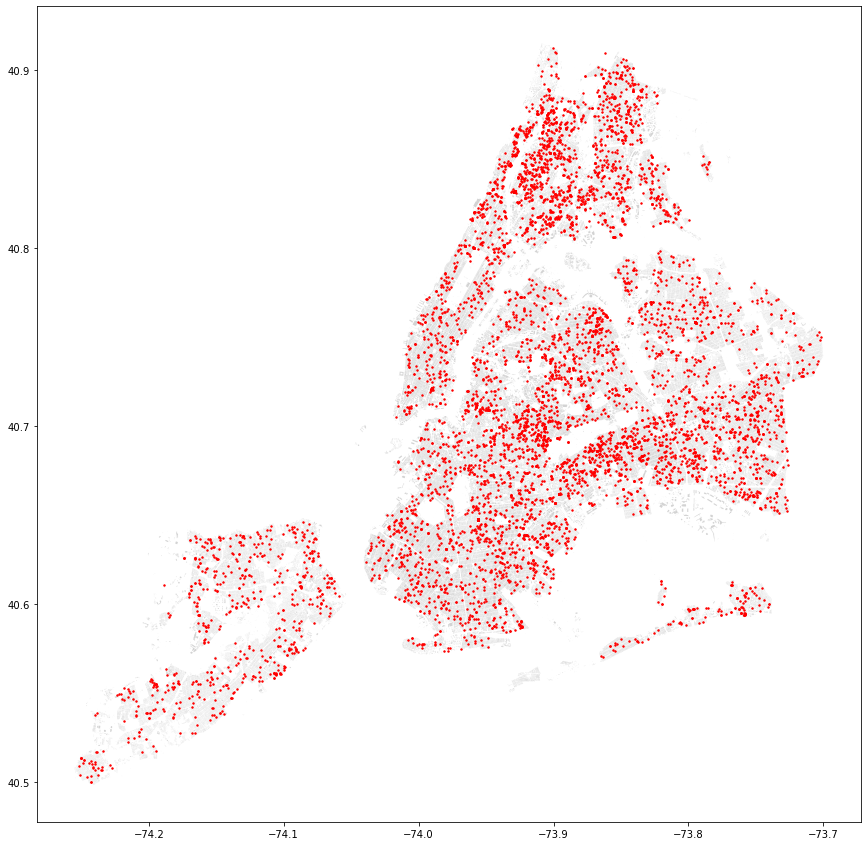

In [10]:
fig,ax = plt.subplots(figsize = (15,15))
nyc_map.plot(ax = ax, color = 'lightgrey')
geo_df.plot(ax = ax, markersize = 2, color = 'red', marker = 'o')

# Heat Map

/var/folders/5r/_x41b2p560v3csbcs3l26vlc0000gn/T/ipykernel_58273/1399832916.py:5: DtypeWarning: Columns (8,18,29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  nyc_311 = pd.read_csv('/Users/krishna-mac/Desktop/CitadelDataOpen/Data2/New_York_NY_311.csv')


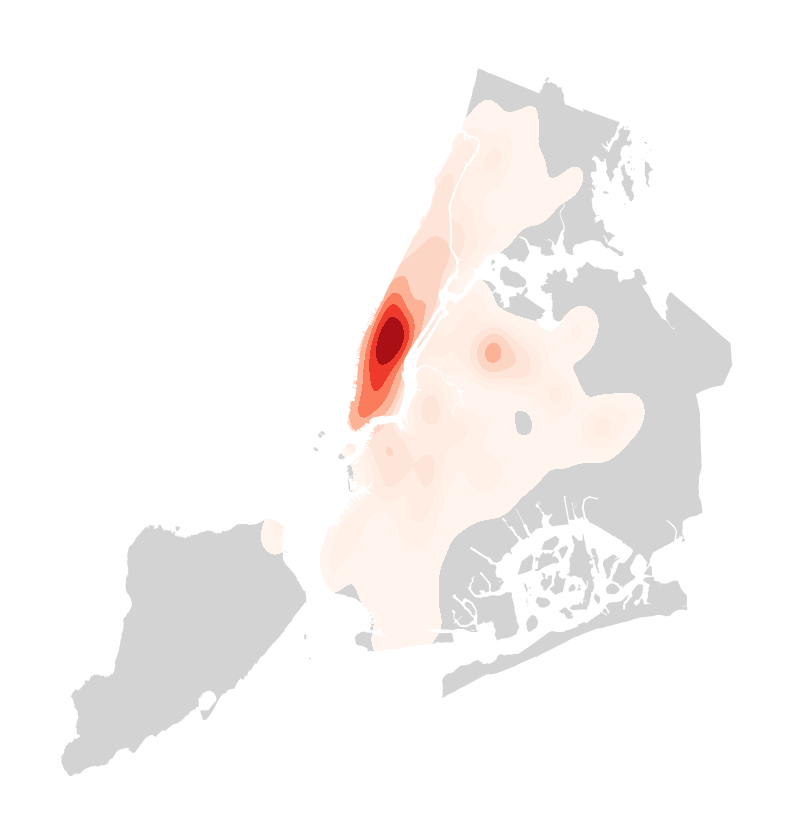

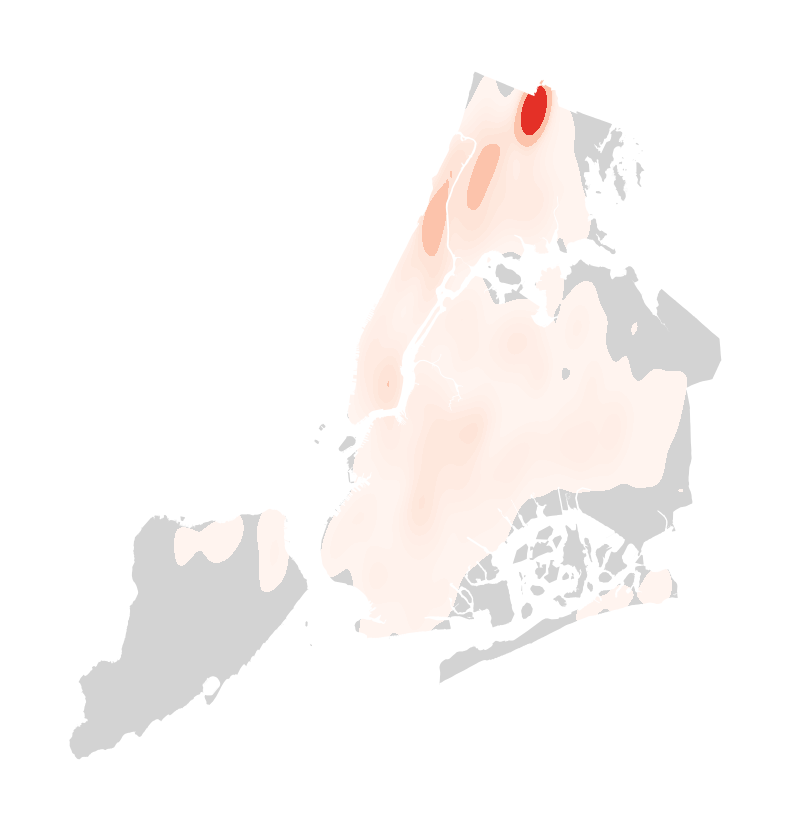

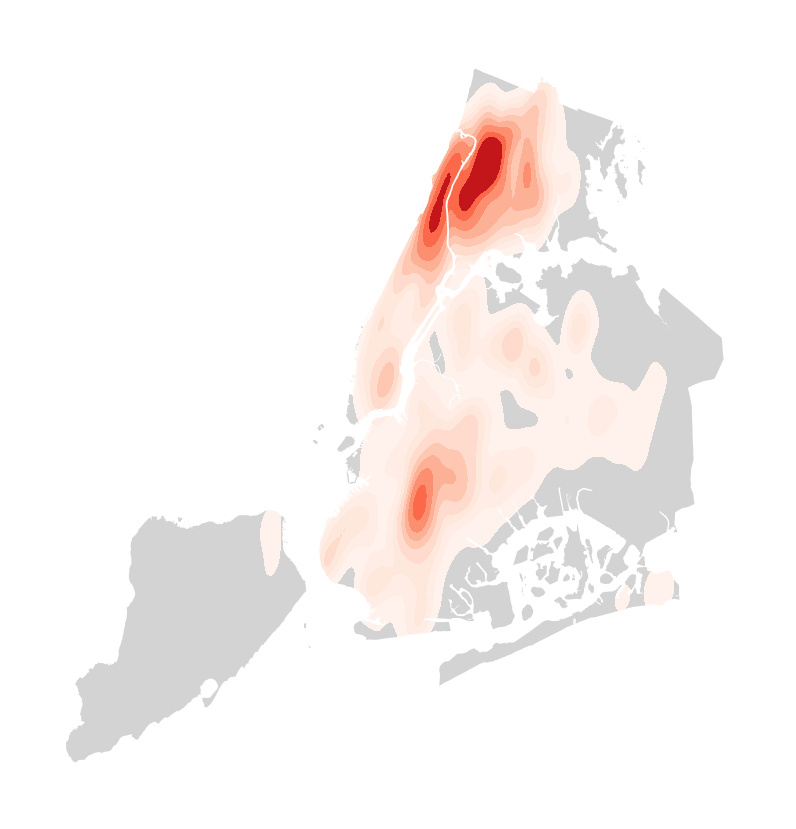

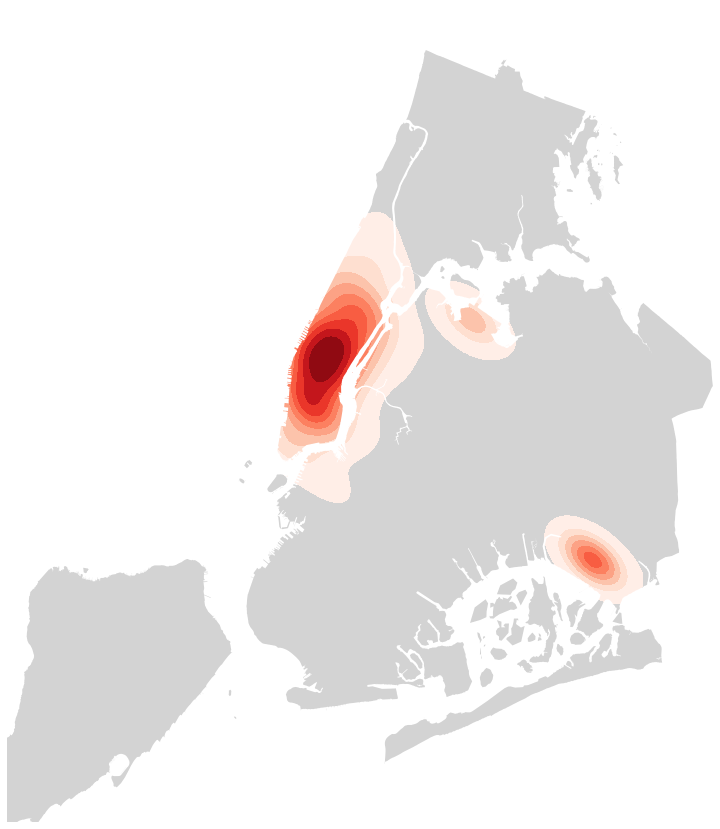

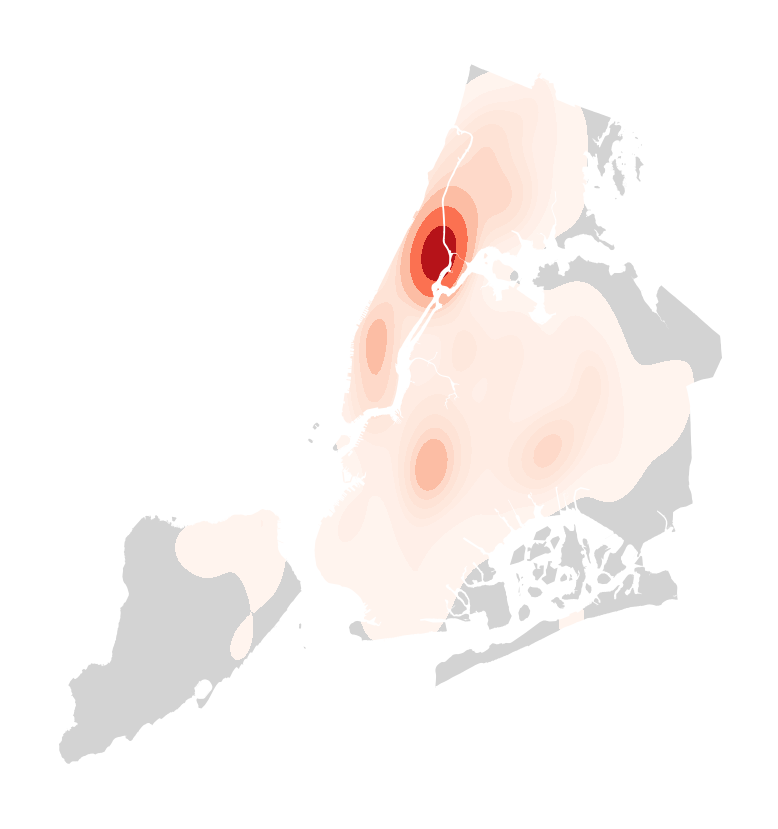

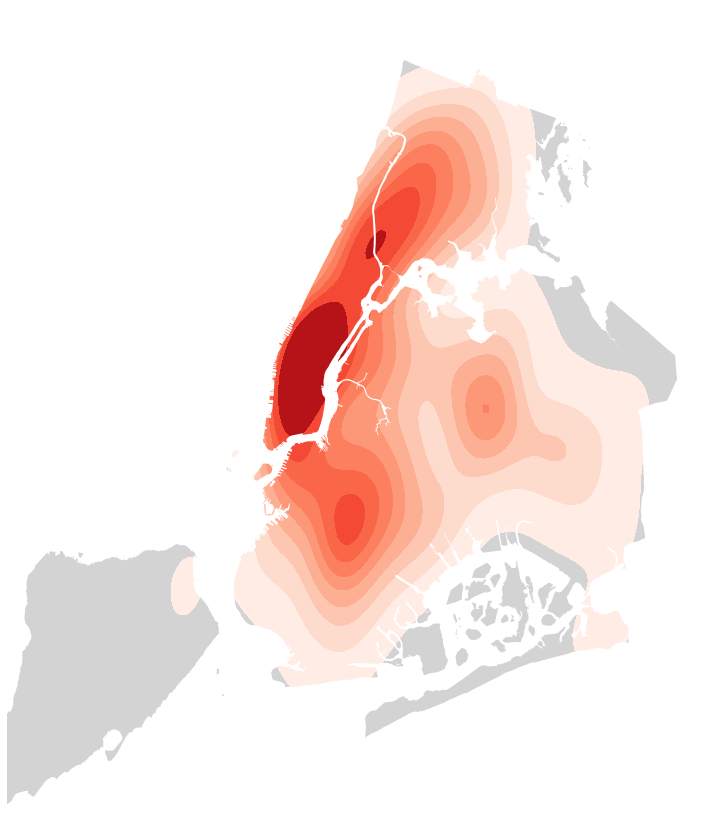

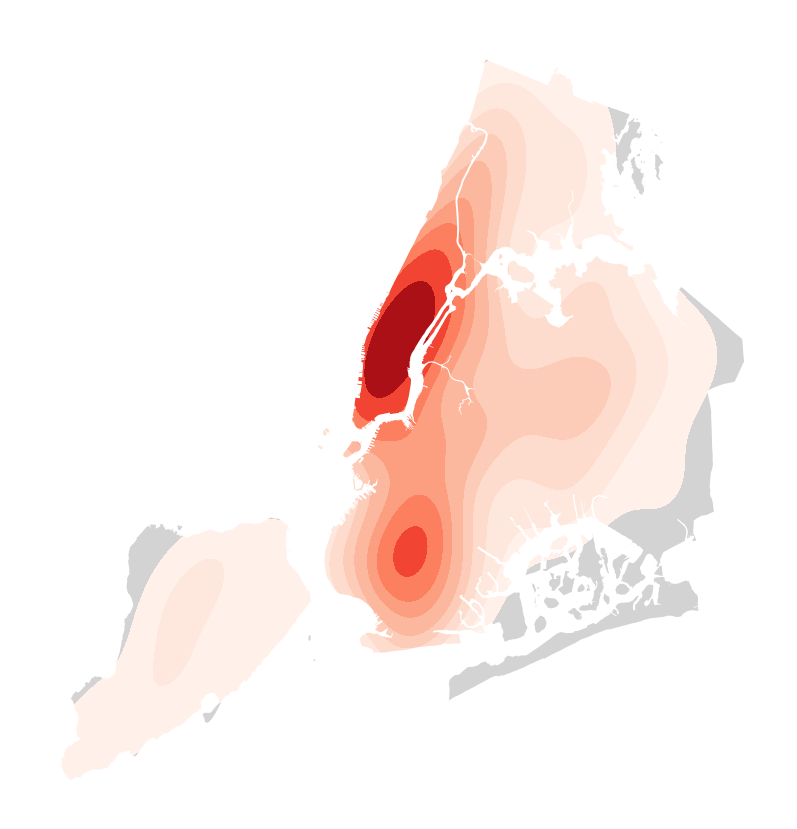

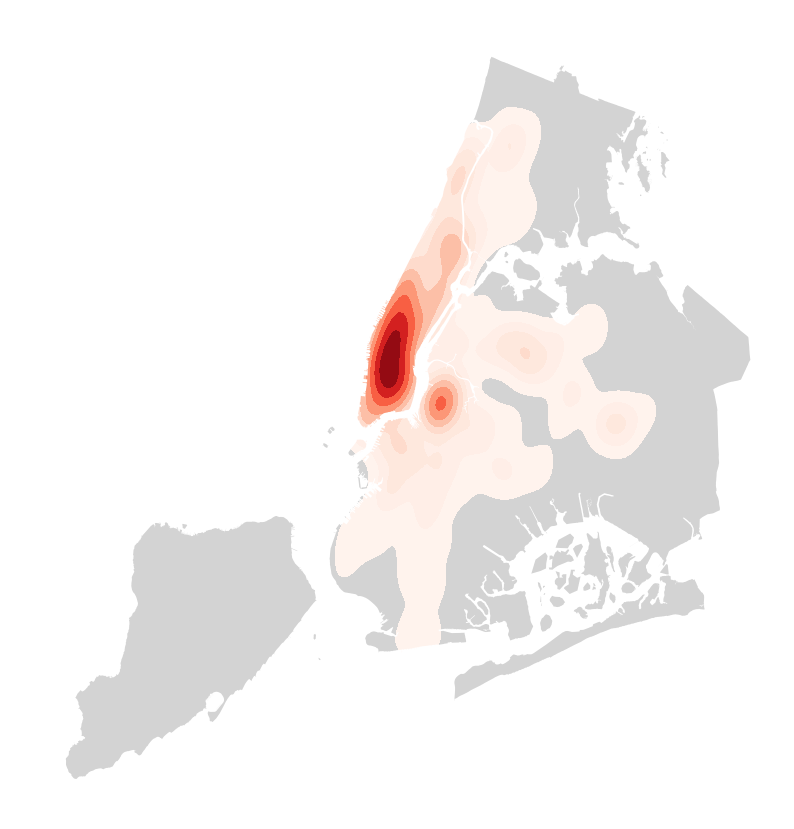

In [13]:
import geoplot as gplt
import geoplot.crs as gcrs
import geopandas as gpd

nyc_311 = pd.read_csv('/Users/krishna-mac/Desktop/CitadelDataOpen/Data2/New_York_NY_311.csv')
nyc_311 = nyc_311[['Complaint Type','Latitude','Longitude']]
nyc_311 = nyc_311.dropna()
nyc_311['keep'] = nyc_311.apply(lambda row: 0 if(row.Longitude < -74.2555913 or row.Longitude > -73.70000906 or row.Latitude < 40.4961154 or row.Latitude > 40.91553278) else 1, axis=1)
nyc_311 = nyc_311.query("keep == 1")

complaint_list = ['Homeless Person Assistance','Noise - Residential',
                 'HEAT/HOT WATER','Lost Property','Drug Activity','Non-Residential Heat','Face Covering Violation',
                 'Encampment']

boroughs = gpd.read_file(gplt.datasets.get_path('nyc_boroughs'))
for complaint in complaint_list:
    nyc_graffiti = nyc_311[nyc_311['Complaint Type'] == complaint]
    
    geometry = [Point(xy) for xy in zip(nyc_graffiti['Longitude'],nyc_graffiti['Latitude'])]
    crs = 'EPSG:4326'
    geo_df = gpd.GeoDataFrame(nyc_graffiti, crs = crs, geometry = geometry)
    geo_df = geo_df.dropna()

    ax = gplt.polyplot(boroughs, figsize=(15,15), projection=gcrs.AlbersEqualArea(), zorder=1, color='lightgrey')
    gplt.kdeplot(geo_df, cmap='Reds', shade=True, clip=boroughs, ax=ax)